In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('synthetic_online_retail_data.csv')
df.head(10)

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age
0,13542,2024-12-17,784,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1.0,F,56
1,23188,2024-06-01,682,50,Sports & Outdoors,Soccer Ball,5,299.34,Credit Card,Port Matthew,NaN,M,59
2,55098,2025-02-04,684,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5.0,F,64
3,65208,2024-10-28,204,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5.0,M,34
4,63872,2024-05-10,202,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1.0,F,33
5,29989,2024-12-03,829,10,Electronics,Smartphone,4,196.16,Bank Transfer,East Tonyaberg,5.0,F,21
6,79809,2024-06-07,706,10,Electronics,Tablet,5,272.75,Bank Transfer,North Jessicabury,NaN,M,57
7,27282,2024-07-15,405,50,Sports & Outdoors,Yoga Mat,2,292.90,Cash on Delivery,Aliciaberg,NaN,F,60
8,41394,2024-12-17,549,30,Home & Living,Pillow,3,429.11,Credit Card,West Larrymouth,3.0,F,69
9,48695,2024-04-12,545,30,Home & Living,Blanket,4,191.39,Credit Card,Lake Ian,5.0,F,34


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     1000 non-null   int64  
 1   order_date      1000 non-null   object 
 2   product_id      1000 non-null   int64  
 3   category_id     1000 non-null   int64  
 4   category_name   1000 non-null   object 
 5   product_name    1000 non-null   object 
 6   quantity        1000 non-null   int64  
 7   price           1000 non-null   float64
 8   payment_method  1000 non-null   object 
 9   city            1000 non-null   object 
 10  review_score    799 non-null    float64
 11  gender          897 non-null    object 
 12  age             1000 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


In [4]:
df["order_date"] = pd.to_datetime(df["order_date"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     1000 non-null   int64         
 1   order_date      1000 non-null   datetime64[ns]
 2   product_id      1000 non-null   int64         
 3   category_id     1000 non-null   int64         
 4   category_name   1000 non-null   object        
 5   product_name    1000 non-null   object        
 6   quantity        1000 non-null   int64         
 7   price           1000 non-null   float64       
 8   payment_method  1000 non-null   object        
 9   city            1000 non-null   object        
 10  review_score    799 non-null    float64       
 11  gender          897 non-null    object        
 12  age             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 101.7+ KB


In [6]:
df.dropna(inplace=True)
df = df[df['quantity'] > 0]
df['TotalPrice'] = df['quantity'] * df['price']

In [7]:
df.head()

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age,TotalPrice
0,13542,2024-12-17,784,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1.0,F,56,746.72
2,55098,2025-02-04,684,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5.0,F,64,115.00
3,65208,2024-10-28,204,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5.0,M,34,460.22
4,63872,2024-05-10,202,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1.0,F,33,706.88
5,29989,2024-12-03,829,10,Electronics,Smartphone,4,196.16,Bank Transfer,East Tonyaberg,5.0,F,21,784.64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 721 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     721 non-null    int64         
 1   order_date      721 non-null    datetime64[ns]
 2   product_id      721 non-null    int64         
 3   category_id     721 non-null    int64         
 4   category_name   721 non-null    object        
 5   product_name    721 non-null    object        
 6   quantity        721 non-null    int64         
 7   price           721 non-null    float64       
 8   payment_method  721 non-null    object        
 9   city            721 non-null    object        
 10  review_score    721 non-null    float64       
 11  gender          721 non-null    object        
 12  age             721 non-null    int64         
 13  TotalPrice      721 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(5)
memory us

In [10]:
import numpy as np

In [13]:
pivot_table1 = df.pivot_table(values='TotalPrice', index='city', aggfunc=np.sum).head(10)
pivot_table1

C:\Users\Frames\AppData\Local\Temp\ipykernel_3032\3654759680.py:1: FutureWarning: The provided callable <function sum at 0x0000020635507EC0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table1 = df.pivot_table(values='TotalPrice', index='city', aggfunc=np.sum).head(10)


,TotalPrice
city,
Alexanderborough,247.64
Allisonland,611.15
Alvaradoborough,72.72
Alvaradobury,846.44
Amandaborough,243.04
Amandamouth,488.49
Amyhaven,1188.95
Andersonchester,1710.60
Andersonfort,556.68


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

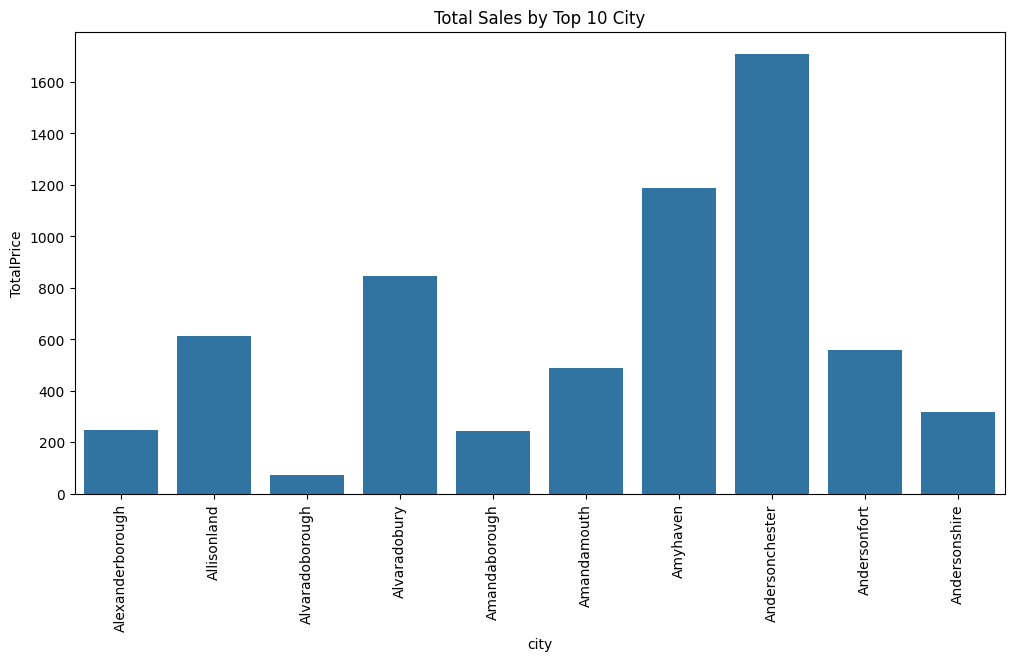

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x=pivot_table1.index, y=pivot_table1['TotalPrice'])
plt.xticks(rotation=90)
plt.title('Total Sales by Top 10 City')
plt.show()

In [21]:
pivot_table2 = df.pivot_table(values='quantity', index='product_name', aggfunc=np.sum)
pivot_table2

C:\Users\Frames\AppData\Local\Temp\ipykernel_3032\717946022.py:1: FutureWarning: The provided callable <function sum at 0x0000020635507EC0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table2 = df.pivot_table(values='quantity', index='product_name', aggfunc=np.sum)


,quantity
product_name,
Basketball,63
Blanket,93
Carpet,69
Dress,77
Eraser,82
Headphones,89
Laptop,113
Notebook,81
Novel,48


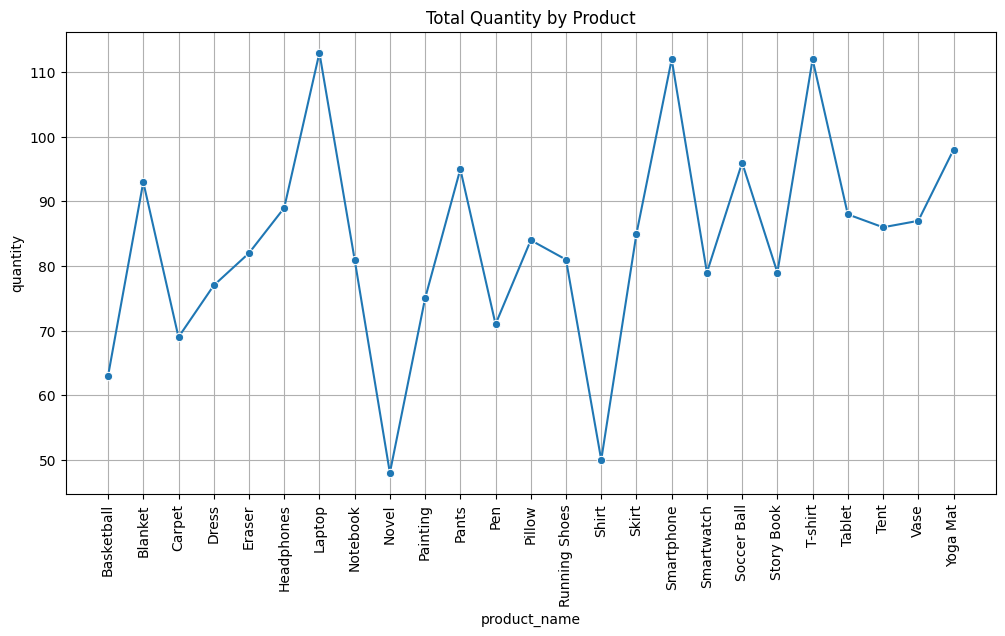

In [24]:
plt.figure(figsize=(12,6))
sns.lineplot(x=pivot_table2.index, y=pivot_table2['quantity'], marker='o')
plt.xticks(rotation=90)
plt.title('Total Quantity by Product')
plt.grid()
plt.show()

In [25]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['YearMonth'] = df['order_date'].dt.to_period('M')
pivot_table3 = df.pivot_table(values='TotalPrice', index='YearMonth', aggfunc=np.sum)
pivot_table3

C:\Users\Frames\AppData\Local\Temp\ipykernel_3032\2990124564.py:3: FutureWarning: The provided callable <function sum at 0x0000020635507EC0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table3 = df.pivot_table(values='TotalPrice', index='YearMonth', aggfunc=np.sum)


,TotalPrice
YearMonth,
2024-03,20457.10
2024-04,33611.80
2024-05,49227.32
2024-06,37757.20
2024-07,43046.15
2024-08,57070.83
2024-09,54183.34
2024-10,42624.25
2024-11,38806.44


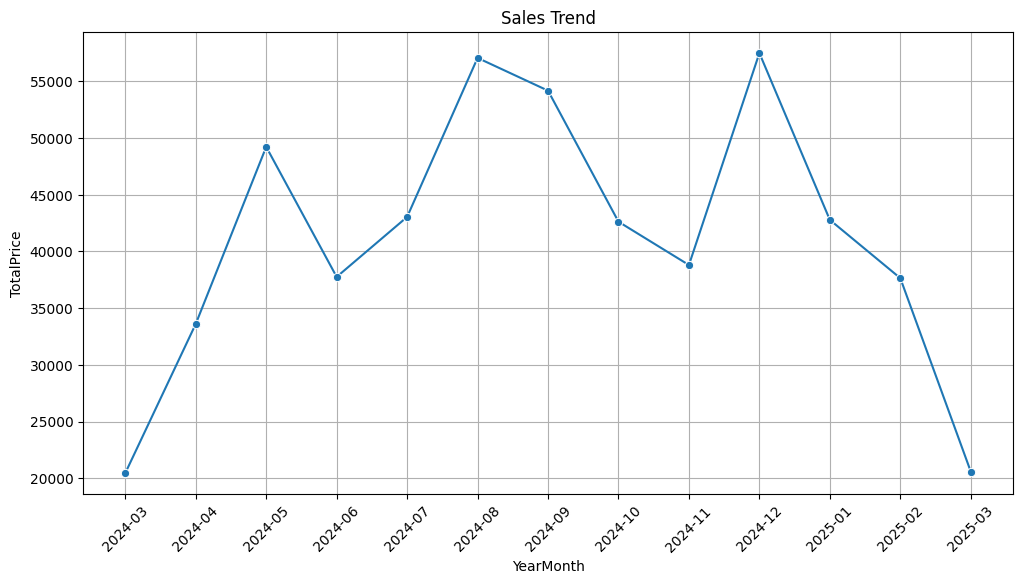

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(x=pivot_table3.index.astype(str), y=pivot_table3['TotalPrice'], marker='o')
plt.xticks(rotation=45)
plt.title('Sales Trend')
plt.grid()
plt.show()

In [30]:
pivot_table4 = df.pivot_table(values='quantity', index='product_name', aggfunc=np.sum).nlargest(10, 'quantity')
pivot_table4

C:\Users\Frames\AppData\Local\Temp\ipykernel_3032\2935141173.py:1: FutureWarning: The provided callable <function sum at 0x0000020635507EC0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table4 = df.pivot_table(values='quantity', index='product_name', aggfunc=np.sum).nlargest(10, 'quantity')


,quantity
product_name,
Laptop,113
Smartphone,112
T-shirt,112
Yoga Mat,98
Soccer Ball,96
Pants,95
Blanket,93
Headphones,89
Tablet,88


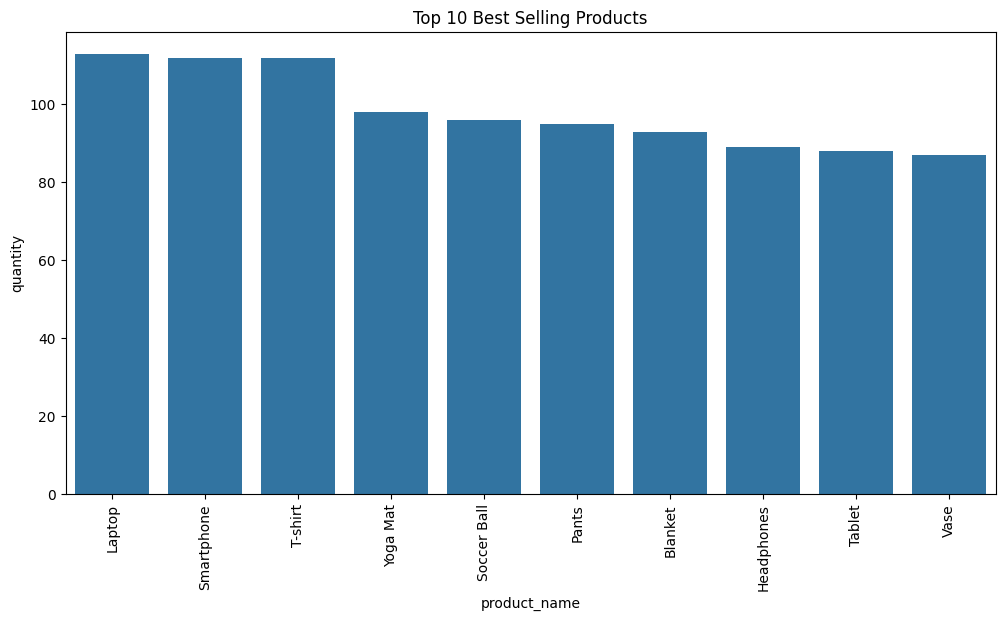

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x=pivot_table4.index, y=pivot_table4['quantity'])
plt.xticks(rotation=90)
plt.title('Top 10 Best Selling Products')
plt.show()